## Описание проекта

Необходимо подготовить прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.
Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. В вашем распоряжении данные с параметрами добычи и очистки.
Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Данные находятся в трёх файлах:
- gold_recovery_train_new.csv — обучающая выборка;
- gold_recovery_test_new.csv — тестовая выборка;
- gold_recovery_full_new.csv — исходные данные. </p>
Данные индексируются датой и временем получения информации (признак date). Соседние по времени параметры часто похожи.
Некоторые параметры недоступны, потому что замеряются и/или рассчитываются значительно позже. Из-за этого в тестовой выборке отсутствуют некоторые признаки, которые могут быть в обучающей. Также в тестовом наборе нет целевых признаков.
Исходный датасет содержит обучающую и тестовую выборки со всеми признаками.

## Загрузка и подготовка данных

In [1]:
#библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#модели
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.dummy import DummyRegressor

#метрики
from sklearn.metrics import mean_absolute_error

#методы
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer

In [2]:
data_train = pd.read_csv('/datasets/gold_recovery_train_new.csv')
data_train.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [3]:
data_train.shape

(14149, 87)

In [4]:
data_train.describe()

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,14148.000000,14148.000000,13938.000000,14149.000000,14149.000000,14149.000000,14049.000000,14144.000000,14149.000000,14129.000000,...,14143.000000,14148.000000,14148.000000,14148.000000,14148.000000,14148.000000,14148.000000,14148.000000,14147.000000,14148.000000
mean,5.142034,10.132960,9.202849,44.003792,66.518832,9.607035,2.597298,10.512122,2.918421,133.320659,...,19.985454,-478.696836,15.487065,-460.229416,16.775136,-483.956022,13.064590,-483.966564,19.577539,-506.798480
std,1.369586,1.654930,2.790516,4.905261,10.295402,2.319069,0.971843,3.003617,0.903712,39.431659,...,5.657723,50.736021,5.255655,58.843586,5.831906,37.892788,5.765617,39.207913,5.764417,37.079249
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003112,...,0.000000,-799.709069,0.000000,-799.889113,-0.372054,-797.142475,0.646208,-800.006180,0.195324,-809.398668
25%,4.211620,9.297355,7.484645,43.276111,62.545817,7.997429,1.905973,8.811324,2.368607,107.006651,...,14.990775,-500.628656,11.894558,-500.149000,11.083980,-500.363177,8.994405,-500.105994,14.989304,-500.745104
50%,4.994652,10.297144,8.845462,44.872436,67.432775,9.480270,2.592022,10.514621,2.851025,133.018328,...,20.001789,-499.681450,14.975536,-499.388738,17.932223,-499.702452,11.997547,-499.914556,19.984175,-500.061431
75%,5.859540,11.170603,10.487508,46.166425,72.346428,11.003707,3.241723,11.933009,3.434764,159.825396,...,24.990826,-477.472413,20.059375,-400.039008,21.346550,-487.712108,17.982903,-453.186936,24.991623,-499.536466
max,16.001945,17.031899,18.124851,52.756638,100.000000,19.552149,5.639565,22.317730,8.197408,250.127834,...,30.115735,-245.239184,24.007913,-145.071088,43.709931,-275.073125,27.926001,-157.396071,32.188906,-104.427459


In [5]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14149 non-null  object 
 1   final.output.concentrate_ag                         14148 non-null  float64
 2   final.output.concentrate_pb                         14148 non-null  float64
 3   final.output.concentrate_sol                        13938 non-null  float64
 4   final.output.concentrate_au                         14149 non-null  float64
 5   final.output.recovery                               14149 non-null  float64
 6   final.output.tail_ag                                14149 non-null  float64
 7   final.output.tail_pb                                14049 non-null  float64
 8   final.output.tail_sol                               14144 non-null  float64


In [6]:
data_test = pd.read_csv('/datasets/gold_recovery_test_new.csv')
data_test.head()

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


In [7]:
data_test.shape

(5290, 53)

In [8]:
data_test.describe()

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,5286.000000,5285.000000,5290.000000,5286.000000,5.290000e+03,5290.000000,5.290000e+03,5290.000000,5.290000e+03,5290.000000,...,5.290000e+03,5290.000000,5.290000e+03,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000
mean,174.839652,8.683596,7.266339,1.383803,1.539494e+03,-497.665883,1.545174e+03,-500.273098,1.527272e+03,-498.330680,...,1.632007e+01,-505.144570,1.373544e+01,-463.349858,12.804186,-501.329122,9.881145,-495.663398,17.304935,-501.793193
std,43.027080,3.072050,0.610219,0.643474,1.167979e+02,19.952431,1.222246e+02,32.968307,1.225380e+02,21.964876,...,3.493583e+00,31.427337,3.430484e+00,86.189107,3.026591,17.951495,2.868205,34.535007,4.536544,39.044215
min,2.566156,0.003839,5.650000,0.004984,5.445860e-32,-795.316337,6.647490e-32,-799.997015,4.033736e-32,-799.960571,...,1.079872e-16,-799.798523,2.489718e-17,-800.836914,0.069227,-797.323986,0.528083,-800.220337,-0.079426,-809.741464
25%,147.121401,6.489555,6.890000,0.907623,1.498936e+03,-500.357298,1.498971e+03,-500.703002,1.473230e+03,-501.018117,...,1.403618e+01,-500.868258,1.202862e+01,-500.323028,10.914838,-500.726841,8.036719,-500.194668,13.997317,-500.690984
50%,177.828489,8.052207,7.250000,1.197610,1.585129e+03,-499.969164,1.595622e+03,-500.028514,1.549595e+03,-500.017711,...,1.700847e+01,-500.115727,1.496486e+01,-499.576513,12.954182,-499.990332,10.004301,-499.990535,16.014935,-500.007126
75%,208.125438,10.027764,7.600000,1.797819,1.602077e+03,-499.568951,1.602324e+03,-499.293257,1.601144e+03,-498.994130,...,1.803862e+01,-499.404224,1.596213e+01,-400.933805,15.097528,-499.283191,11.997467,-499.719913,21.020013,-499.373018
max,265.983123,40.000000,15.500000,4.102454,2.103104e+03,-57.195404,1.813084e+03,-142.527229,1.715054e+03,-150.937035,...,3.005180e+01,-401.565212,3.126971e+01,-6.506986,25.258848,-244.483566,14.086866,-137.740004,26.705889,-123.307487


In [9]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5290 entries, 0 to 5289
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5290 non-null   object 
 1   primary_cleaner.input.sulfate               5286 non-null   float64
 2   primary_cleaner.input.depressant            5285 non-null   float64
 3   primary_cleaner.input.feed_size             5290 non-null   float64
 4   primary_cleaner.input.xanthate              5286 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5290 non-null   float64
 10  primary_clea

In [10]:
data_full = pd.read_csv('/datasets/gold_recovery_full_new.csv')
data_full.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [11]:
data_full.shape

(19439, 87)

In [12]:
data_full.describe()

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,19438.000000,19438.000000,19228.000000,19439.000000,19439.000000,19438.000000,19338.000000,19433.000000,19439.000000,19415.000000,...,19433.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438.000000,19437.000000,19438.000000
mean,5.168470,9.978895,9.501224,44.076513,67.050208,9.688589,2.705795,10.583728,3.042467,144.624774,...,18.987674,-485.894516,15.010366,-461.078636,15.694452,-488.684065,12.198224,-487.149827,18.959024,-505.436305
std,1.372348,1.669240,2.787537,5.129784,10.125840,2.328642,0.949077,2.868782,0.922808,44.464071,...,5.411058,47.758570,4.890228,67.405524,5.510974,34.533396,5.333024,38.347312,5.550498,37.689057
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003112,...,0.000000,-799.798523,0.000000,-800.836914,-0.372054,-797.323986,0.528083,-800.220337,-0.079426,-809.741464
25%,4.251240,9.137262,7.722820,43.402215,63.299712,8.062878,2.040119,8.938947,2.461138,114.107029,...,14.975734,-500.704892,11.940294,-500.187742,10.988606,-500.458467,8.971105,-500.129462,14.983037,-500.728067
50%,5.066094,10.102433,9.218961,45.011244,68.172738,9.743623,2.748730,10.622456,2.984909,143.232103,...,18.017481,-499.837793,14.971014,-499.459786,15.000036,-499.802605,11.019433,-499.935317,19.960541,-500.048400
75%,5.895527,11.035769,10.947813,46.275313,72.686642,11.134294,3.333216,12.104271,3.571351,175.075656,...,23.012470,-498.249730,19.034162,-400.118106,18.026190,-498.384187,14.019088,-499.436708,24.003170,-499.495378
max,16.001945,17.031899,19.615720,52.756638,100.000000,19.552149,5.804178,22.317730,8.245022,265.983123,...,30.115735,-245.239184,31.269706,-6.506986,43.709931,-244.483566,27.926001,-137.740004,32.188906,-104.427459


In [13]:
data_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                19439 non-null  object 
 1   final.output.concentrate_ag                         19438 non-null  float64
 2   final.output.concentrate_pb                         19438 non-null  float64
 3   final.output.concentrate_sol                        19228 non-null  float64
 4   final.output.concentrate_au                         19439 non-null  float64
 5   final.output.recovery                               19439 non-null  float64
 6   final.output.tail_ag                                19438 non-null  float64
 7   final.output.tail_pb                                19338 non-null  float64
 8   final.output.tail_sol                               19433 non-null  float64


<b>Вывод по открытию датасетов:</b> представленные файлы содержат определенное количество пропусков, в основном незначительное (до 100 значений по столбцу), таким образом пропуски можно было бы игнорировать, если они попадаются в одних и тех же строках.
В связи с тем что для обучения модели необходимо использовать только те данные которые также имеются в тестовом датасете, предлагается перед продолжением анализа убрать невостребованные столбцы из обучающего датасета. Таким образом мы в том числе отбросим часть "пропусков" которые заполнять точно не нужно.

In [14]:
#посчитаем строки с пропусками
print('data_train isna.any shape',data_train[data_train.isna().any(axis=1)].shape)
print('data_test isna.any shape', data_test[data_test.isna().any(axis=1)].shape)
data_test[data_test.isna().any(axis=1)].head(15).T

data_train isna.any shape (3132, 87)
data_test isna.any shape (61, 53)


,30,31,32,33,34,35,36,37,188,319,335,336,383,468,487
date,2016-09-02 06:59:59,2016-09-02 10:59:59,2016-09-02 11:59:59,2016-09-02 12:59:59,2016-09-02 13:59:59,2016-09-02 14:59:59,2016-09-02 15:59:59,2016-09-02 16:59:59,2016-09-09 05:59:59,2016-09-16 07:59:59,2016-09-17 05:59:59,2016-09-17 06:59:59,2016-09-19 05:59:59,2016-09-29 13:59:59,2016-09-30 08:59:59
primary_cleaner.input.sulfate,NaN,64.558863,112.768923,132.526641,138.109389,137.468356,142.640808,132.024531,92.965359,44.231477,150.562231,152.131208,95.969261,16.223643,51.46778
primary_cleaner.input.depressant,NaN,0.061864,6.061414,8.257739,7.975929,8.033932,7.994107,7.992356,7.03348,1.710568,7.581656,7.552544,5.063318,NaN,7.680319
primary_cleaner.input.feed_size,7.16,7.1095,6.15,6.6715,7.64,7.6315,7.63,8.03,8.16,7.27,8.1,8.1,7.02,8.38,6.3
primary_cleaner.input.xanthate,NaN,0.520084,0.819723,0.803072,0.800642,0.795075,0.710677,0.697363,0.498874,0.283863,1.18564,1.190593,0.499984,0.080215,0.445809
primary_cleaner.state.floatbank8_a_air,412.629243,1433.954958,1426.909049,1419.081952,1420.088768,1420.541569,1416.369505,1412.51082,1303.137293,1501.419491,1550.695211,1551.024401,1502.717316,1601.171129,1603.354167
primary_cleaner.state.floatbank8_a_level,-795.316337,-499.688476,-500.74972,-499.519835,-499.765691,-499.448089,-499.72073,-499.868558,-499.388756,-500.791856,-499.56975,-499.694714,-497.755334,-500.306888,-499.642309
primary_cleaner.state.floatbank8_b_air,413.703253,1553.150053,1544.540348,1530.869084,1522.047015,1521.031586,1520.39116,1520.219752,1297.967963,1501.20067,1548.047679,1549.416734,1499.96898,1601.390223,1597.981158
primary_cleaner.state.floatbank8_b_level,-787.396567,-500.878552,-501.570124,-499.74924,-499.458234,-500.215288,-499.610693,-499.762451,-500.10646,-496.705047,-500.086902,-499.618603,-499.933764,-499.7042,-500.289974
primary_cleaner.state.floatbank8_c_air,441.60426,1517.894908,1509.087281,1494.243228,1483.131191,1480.336556,1477.798629,1480.035725,1296.524149,1501.597798,1552.932878,1550.522136,1499.221865,1600.129669,1598.989862


In [15]:
#Имеем 61 строку с пропусками в одном или нескольких столбцах. Выведем на экран только столбцы с пропусками
columns_count = data_test.count()
print('isna.any rows qnty data_test')
print(len(data_test)-columns_count[columns_count<len(data_test)])
columns_count_train = data_train.count()
print('isna.any rows qnty data_train')
print(len(data_train)-columns_count_train[columns_count_train<len(data_train)])

isna.any rows qnty data_test
primary_cleaner.input.sulfate                4
primary_cleaner.input.depressant             5
primary_cleaner.input.xanthate               4
rougher.input.feed_rate                      3
rougher.input.feed_size                      1
rougher.input.feed_sol                      21
rougher.input.floatbank10_sulfate            5
rougher.input.floatbank11_sulfate            8
rougher.input.floatbank11_xanthate          25
secondary_cleaner.state.floatbank2_a_air     3
secondary_cleaner.state.floatbank2_b_air     2
secondary_cleaner.state.floatbank3_a_air     9
dtype: int64
isna.any rows qnty data_train
final.output.concentrate_ag                     1
final.output.concentrate_pb                     1
final.output.concentrate_sol                  211
final.output.tail_pb                          100
final.output.tail_sol                           5
                                             ... 
secondary_cleaner.state.floatbank5_a_level      1
secondary_clea

In [16]:
# для зрительной оценки сформируем таблицу в которой будет представлено по 2 строки на каждый вид пропуска
data_air = pd.DataFrame(columns = data_test.columns)
nan_columns = columns_count[columns_count<len(data_test)].index
for i in nan_columns:
    data_air = data_air.append(data_test.loc[data_test[i].isna()].head(2))
data_air.T

,30,3125,30,468,30,488,5167,5184,5184,188,...,4963,4964,319,488,4732,4733,3487,3488,31,32
date,2016-09-02 06:59:59,2017-09-26 12:59:59,2016-09-02 06:59:59,2016-09-29 13:59:59,2016-09-02 06:59:59,2016-09-30 09:59:59,2017-12-25 18:59:59,2017-12-27 10:59:59,2017-12-27 10:59:59,2016-09-09 05:59:59,...,2017-12-16 23:59:59,2017-12-17 00:59:59,2016-09-16 07:59:59,2016-09-30 09:59:59,2017-12-06 08:59:59,2017-12-06 09:59:59,2017-10-12 20:59:59,2017-10-12 21:59:59,2016-09-02 10:59:59,2016-09-02 11:59:59
primary_cleaner.input.sulfate,NaN,NaN,NaN,16.223643,NaN,2.92672,91.646768,NaN,NaN,92.965359,...,45.935947,69.708869,44.231477,2.92672,210.032144,204.75624,33.239969,75.28075,64.558863,112.768923
primary_cleaner.input.depressant,NaN,0.003839,NaN,NaN,NaN,40.0,7.06114,NaN,NaN,7.03348,...,4.785894,5.18169,1.710568,40.0,9.00136,9.001591,3.382857,3.940023,0.061864,6.061414
primary_cleaner.input.feed_size,7.16,7.38,7.16,8.38,7.16,6.3,7.9,7.2,7.2,8.16,...,7.49,7.49,7.27,6.3,6.6,6.6,6.88,6.88,7.1095,6.15
primary_cleaner.input.xanthate,NaN,NaN,NaN,0.080215,NaN,NaN,0.596297,0.028131,0.028131,0.498874,...,0.349275,0.478115,0.283863,NaN,1.688372,1.708018,0.662208,1.238591,0.520084,0.819723
primary_cleaner.state.floatbank8_a_air,412.629243,1251.845483,412.629243,1601.171129,412.629243,1600.623393,1598.910355,0.0,0.0,1303.137293,...,1927.484998,1895.502733,1501.419491,1600.623393,1550.149223,1546.968122,1399.04176,1404.065476,1433.954958,1426.909049
primary_cleaner.state.floatbank8_a_level,-795.316337,-471.118852,-795.316337,-500.306888,-795.316337,-499.88319,-436.068041,-782.505268,-782.505268,-499.388756,...,-499.931023,-500.052947,-500.791856,-499.88319,-499.609157,-500.76905,-499.534106,-501.039528,-499.688476,-500.74972
primary_cleaner.state.floatbank8_b_air,413.703253,1248.263605,413.703253,1601.390223,413.703253,1599.058551,1602.678651,0.0,0.0,1297.967963,...,1548.393751,1549.793555,1501.20067,1599.058551,1549.666958,1549.090024,1394.930961,1401.27982,1553.150053,1544.540348
primary_cleaner.state.floatbank8_b_level,-787.396567,-550.127277,-787.396567,-499.7042,-787.396567,-498.724126,-352.038237,-496.652939,-496.652939,-500.10646,...,-799.995232,-799.995589,-496.705047,-498.724126,-498.074444,-504.408323,-499.679881,-502.998436,-500.878552,-501.570124
primary_cleaner.state.floatbank8_c_air,441.60426,1248.421893,441.60426,1600.129669,441.60426,1597.516274,1250.389988,0.0,0.0,1296.524149,...,1157.850239,1148.02419,1501.597798,1597.516274,1553.049341,1552.407449,1397.925813,1401.508231,1517.894908,1509.087281


Количество строк относительно невелико, заполнение пропусков возможно было бы медианным значением, однако дополнительный анализ (выведенные таблицы с сортировкой по пропускам) дал аргументы против такого метода:
Выведенная двумя шагами ранее таблица (все стобцы но строки только с пропусками) показывает что пропуски концентрируются по технологическим процессам и возможно связаны с простоем/разгрузкой участка между партиями материала. Так на участке "rougher.input.floatbank" пропуски в отдельных значениях (№30 и №319 встречаются одновременно с околонулевыми значениями по другим группам) пропуски на участках "secondary_cleaner.state.floatbank(123)(ab)air" встречаются попеременно. Что может также может свидетельствовать о временной разгрузке одних участков при использовании других.
В учебном датасете пропусков больше, но преимущественно за счет нескольких датчиков ("rougher.state.floatbank10_e_air" & "rougher.state.floatbank10_e_air"). Которые возможно не работали именно в те промежутки времени/смены, которые записывались в тестовую выборку).
Таким образом, целесообразно либо удалить строки с пропусками, либо заполнить их при помощи линейной регрессии

In [17]:
#выстроим процедуру заполнения NAN значений

def fill_data_nan (data_in_set, set_name):
    #делим таблицу на строки с пропусками и без
    data_set_nan = data_in_set[data_in_set.isna().any(axis=1)].drop('date',axis=1)
    print('количество строк с пропусками в представленной выборке -',set_name,len(data_set_nan))
    data_set_no_nan = data_in_set[data_in_set.isna().any(axis=1)==False].drop('date',axis=1)
    model_regre = LinearRegression()

    #запускаем цикл по строкам с пропусками
    for i,row in data_set_nan.iterrows():
    #определяем список столбцов по которым в строке пропуски
        columns_to_fill = row[row.isna()].index.tolist()

    #остальную часть строки формируем в датасет для последующего использования в предсказании пропусков
        features_for_prediction = pd.DataFrame(row[row.isna()==False]).T

    #из таблицы без пропусков скидываем столбцы которые нам нужно заполнить
        data_to_learn = data_set_no_nan.drop(columns_to_fill,axis=1)

    #создаем список для сохранения предсказаний
        predicted_items = []
        for z in columns_to_fill:
            model_regre.fit(data_to_learn,data_set_no_nan.loc[:,z]) #в качестве таргета передаем заполняемый сейчас столбец из таблицы без пропусков
            prediction = model_regre.predict(features_for_prediction) #предсказание для заполнения текущего столбца
            predicted_items.append(prediction)
        #раскладываем предсказания в исходную таблицу
        for y in range(0,len(predicted_items)):
            data_in_set.loc[i,columns_to_fill[y]] = predicted_items[y]      
    print('по результатам обработки количество строк с пропусками в выборке -',set_name,len(data_in_set[data_in_set.isna().any(axis=1)]))
    return data_in_set
    

In [18]:
data_test_fill = fill_data_nan(data_test, 'test_data')
# et voila

количество строк с пропусками в представленной выборке - test_data 61
по результатам обработки количество строк с пропусками в выборке - test_data 0


In [19]:
data_train_fill = fill_data_nan(data_train, 'train_data')

количество строк с пропусками в представленной выборке - train_data 3132
по результатам обработки количество строк с пропусками в выборке - train_data 0


<b>Вывод по открытию и подготовке данных</b> в представленных данных не установлены выбросы или заведомо некорректные значения. Анализ имеющихся пропусков показал их зависимость с производственным циклом, в связи с чем для заполнения пропусков была использована линейная регрессия. Пропуски заполнены.

In [20]:
# Проверка корректности отраженного в датасетах значения 
C = data_train['rougher.output.concentrate_au']
F = data_train['rougher.input.feed_au']
T = data_train['rougher.output.tail_au']
data_train_check= pd.DataFrame(data_train['rougher.output.recovery'])
data_train_check['rougher_check'] = ((C*(F-T))/(F*(C-T)))*100
mae_check = mean_absolute_error(data_train_check['rougher_check'],data_train_check['rougher.output.recovery'])
print(mae_check)

9.73512347450521e-15


In [21]:
# Проверка корректности отраженного в датасетах (с заполненными пропусками) значения 
C = data_train_fill['rougher.output.concentrate_au']
F = data_train_fill['rougher.input.feed_au']
T = data_train_fill['rougher.output.tail_au']
data_train_check= pd.DataFrame(data_train_fill['rougher.output.recovery'])
data_train_check['rougher_check'] = ((C*(F-T))/(F*(C-T)))*100
mae_check = mean_absolute_error(data_train_check['rougher_check'],data_train_check['rougher.output.recovery'])
print(mae_check)

9.73512347450521e-15


<b>Вывод по проверке корректности формулы эффективности</b></p>
По результатам пересчета показателей как на входных данных, так и на данных с устраненными пропусками формула расчета эффективности процесса подтверждается.

In [22]:
#рассмотрим признаки, отсутствующие в тестовой выборке
data_train_fill.drop(data_test_fill.columns,axis=1).T

,0,1,2,3,4,5,6,7,8,9,...,14139,14140,14141,14142,14143,14144,14145,14146,14147,14148
final.output.concentrate_ag,6.055403,6.029369,6.055926,6.047977,6.148599,6.482968,6.533849,6.130823,5.834140,5.687063,...,3.236759,3.187398,2.925574,3.076566,3.192996,3.224920,3.195978,3.109998,3.367241,3.598375
final.output.concentrate_pb,9.889648,9.968944,10.213995,9.977019,10.142511,10.049416,10.058141,9.935481,10.071156,9.980404,...,11.692898,11.423128,10.855586,11.542302,11.612338,11.356233,11.349355,11.434366,11.625587,11.737832
final.output.concentrate_sol,5.507324,5.257781,5.383759,4.858634,4.939416,5.480257,4.569100,4.389813,4.876389,5.282514,...,6.745979,6.790500,7.053796,6.929418,6.824441,6.803482,6.862249,6.886013,6.799433,6.717509
final.output.concentrate_au,42.192020,42.701629,42.657501,42.689819,42.774141,41.633678,41.995316,42.452727,43.404078,43.235220,...,46.225130,46.801679,47.765393,46.956275,46.710119,46.713954,46.866780,46.795691,46.408188,46.299438
final.output.recovery,70.541216,69.266198,68.116445,68.347543,66.927016,69.465816,69.300835,70.230976,69.688595,70.279619,...,73.265872,68.369674,64.054699,68.643324,74.817644,73.755150,69.049291,67.002189,65.523246,70.281454
final.output.tail_ag,10.411962,10.462676,10.507046,10.422762,10.360302,10.182708,10.304598,10.443288,10.420140,10.487013,...,8.895144,9.043962,8.578502,8.792890,8.665858,8.769645,8.897321,8.529606,8.777171,8.406690
final.output.tail_pb,0.895447,0.927452,0.953716,0.883763,0.792826,0.664118,0.807342,0.949346,1.065453,1.159805,...,3.425167,3.629573,3.365823,3.120351,2.938592,3.141541,3.130493,2.911418,2.819214,2.517518
final.output.tail_sol,16.904297,16.634514,16.208849,16.532835,16.525686,16.999638,16.723575,16.689959,17.201948,17.483979,...,10.118103,10.037518,10.603464,10.184715,10.241498,10.403181,10.549470,11.115147,10.463847,10.652193
final.output.tail_au,2.143149,2.224930,2.257889,2.146849,2.055292,1.918586,2.058913,2.143437,2.209881,2.209593,...,1.611159,1.838214,1.761994,1.567363,1.393077,1.529220,1.612542,1.596616,1.602879,1.389434
primary_cleaner.output.concentrate_ag,8.547551,8.558743,8.603505,7.221879,9.089428,9.553724,8.968869,8.545238,8.046686,8.098985,...,6.250206,5.899632,6.372520,6.682350,6.650871,6.559174,6.612376,7.128896,7.490444,7.537584


В тестовой выборке отсутствуют значения показателей продукции на выходе с определенных этапов.
Данные сформированы в числовом виде, в float формате.
Такие показатели очевидно требуют большего времени для подготовки и поступают с опозданием (привязываются к таймингу "задним числом").
Для целей прогнозирования процесса рассчитывать на такие показатели нет возможности, т.к. их получение возможно после запуска конвейера и выхода первой продукции.
Таким образом обучение модели для прогнозирования, а также тестирование на таких данных нецелесообразно.

## Анализ данных

Проанализируем значения концентрации металлов на разных этапах обработки. Поскольку в тестовой базе часть данных отсутствует сделаем это на основе учебной выборки

Значения концентрации металла - au на разных этапах в порядке возрастания концентрации


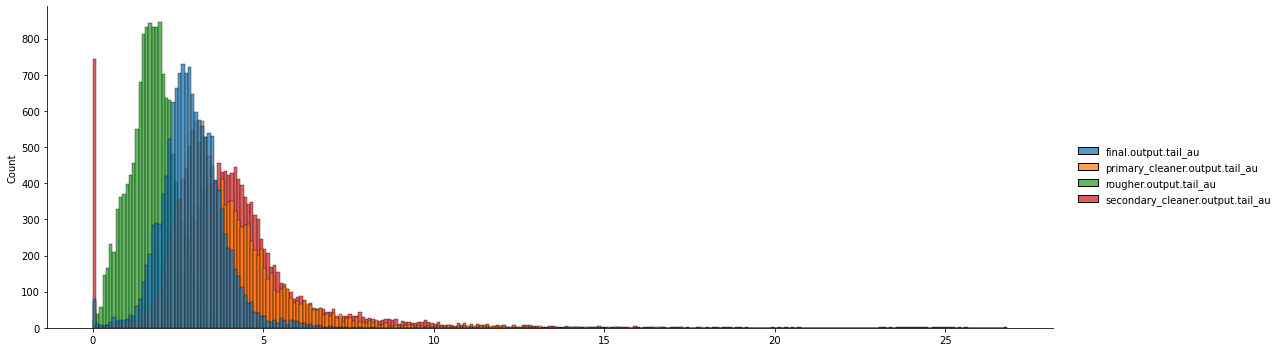

,count,mean,std,min,25%,50%,75%,max
rougher.output.tail,14149.0,1.757473,0.713187,0.020676,1.310800,1.745513,2.186790,9.688980
final.output.tail,14149.0,2.918421,0.903712,0.000000,2.368607,2.851025,3.434764,8.197408
primary_cleaner.output.tail,14149.0,3.839637,1.603544,0.000000,2.867957,3.510337,4.492470,17.788925
secondary_cleaner.output.tail,14149.0,4.246961,2.389060,0.000000,3.153122,3.980210,4.883943,26.811643


Значения концентрации металла - ag на разных этапах в порядке возрастания концентрации


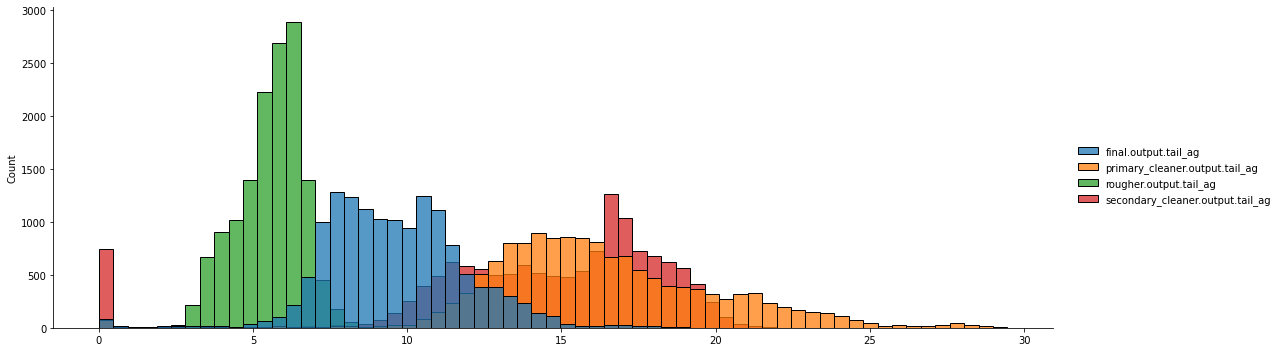

,count,mean,std,min,25%,50%,75%,max
rougher.output.tail,14149.0,5.567339,1.039414,0.594562,4.921773,5.722161,6.310738,12.719177
final.output.tail,14149.0,9.607035,2.319069,0.000000,7.997429,9.480270,11.003707,19.552149
secondary_cleaner.output.tail,14149.0,14.280726,4.477702,0.000000,12.177143,15.356812,17.230072,23.264738
primary_cleaner.output.tail,14149.0,16.303818,3.739735,0.000000,13.873202,15.800433,18.450107,29.459575


Значения концентрации металла - pb на разных этапах в порядке возрастания концентрации


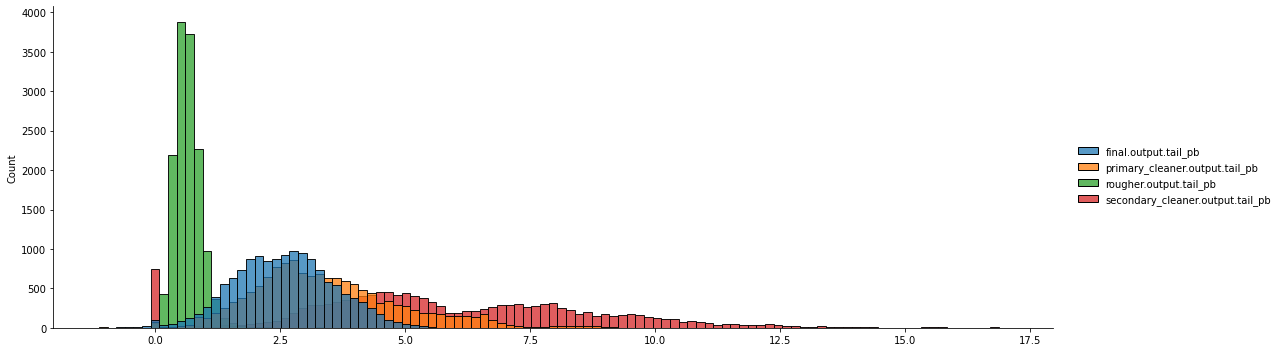

,count,mean,std,min,25%,50%,75%,max
rougher.output.tail,14149.0,0.653277,0.263766,0.007566,0.474047,0.625805,0.794326,3.778064
final.output.tail,14149.0,2.577473,0.996860,-0.978378,1.889827,2.581476,3.237211,5.639565
primary_cleaner.output.tail,14149.0,3.439672,1.494040,-1.125258,2.418663,3.217161,4.250882,9.634565
secondary_cleaner.output.tail,14149.0,5.846237,2.862852,-0.174047,3.978437,5.438447,7.797396,17.042505


In [23]:
metals = ['au', 'ag', 'pb']

total_columns = data_train_fill.columns
for i in metals:
    #сортируем из списка колонок колонки с названием очередного металла
    #print(list(filter((lambda x: i in x), total_columns)))
    col_print = list(filter((lambda x: x.endswith(i) and x.endswith('tail_'+i)) , total_columns))
    table_print = data_train_fill.loc[:,col_print]
    
    print('Значения концентрации металла -', i, 'на разных этапах в порядке возрастания концентрации')
    sns.displot(table_print,height=5, aspect=3)
    plt.show()
    common_columns = table_print.columns
    common_columns = list(map(lambda x: x[:(len(x)-3)],common_columns))
    table_print.columns = common_columns
    table_print = table_print.describe().T.sort_values(by='50%',ascending=True)
    display(table_print)
    if i == 'au':
        progress_frame = pd.DataFrame(index = common_columns)
    progress_frame[i] = table_print['50%']

In [24]:
progress_frame.sort_values(by='au',ascending=True)

,au,ag,pb
rougher.output.tail,1.745513,5.722161,0.625805
final.output.tail,2.851025,9.480270,2.581476
primary_cleaner.output.tail,3.510337,15.800433,3.217161
secondary_cleaner.output.tail,3.980210,15.356812,5.438447


<AxesSubplot:>

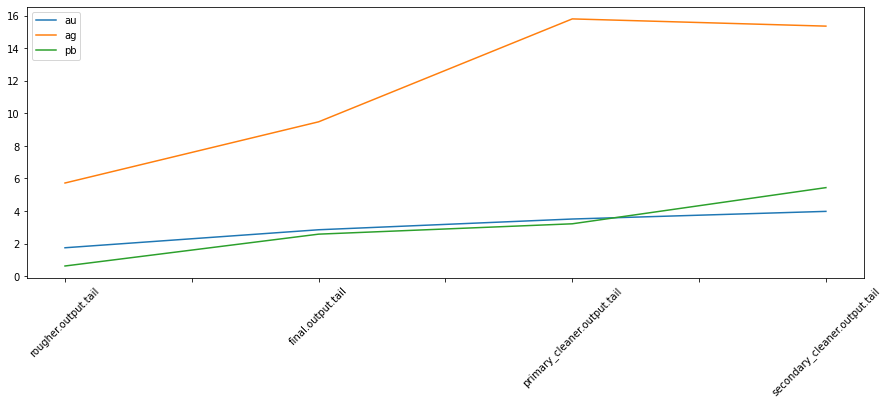

In [25]:
progress_frame.sort_values(by='au',ascending=True).plot(figsize=(15,5),rot = 45)

Концентрация золота равномерно растет по ходу переработки. Концентрация сопутствующего серебра достигает максимума не в итоговом сплаве, а хвостах от финального этапа переработки золота. Очевидно что химия предыдущих этапов способствет одновременной концентрации этих двух металлов. Отделение достаточно высоко концентрированных хвостов серебра на последних этапах, вероятно также повышает доходность процессов, т.к. такие хвосты сами по себе становятся ценным сырьем для производства уже серебра.
Концетрация свинца поэтапно растет с ростом концентрации золота, что связано с повышенной взаимной растворимостью данных металлов. Темп прироста содержания свинца однако ниже темпа прироста содержания золота, т.к. на каждом этапе переработки удается увеличить и концентрацию свинца в отделяемом хвосте.

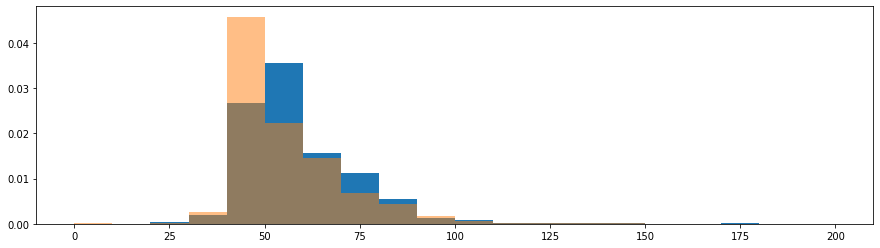

In [26]:
#рассмотрим распределение размеров гранул сырья на тестовой и обучающей выборках:
#data_train_fill['rougher.input.feed_size'].hist(bins=30,figsize=(15,5))
#data_test_fill['rougher.input.feed_size'].hist(bins=30,figsize=(15,5))
plt.figure(figsize=(15,4))
plt.hist(data_train_fill['rougher.input.feed_size'], density=True, bins = 20,range = (0,200))
plt.hist(data_test_fill['rougher.input.feed_size'],density=True, alpha = 0.5, bins = 20, range = (0,200))
plt.show()

Значения размеров гранул подаваемого сырья в целом совпадают.

In [27]:
#рассмотрим суммарную концентрацию всех веществ на разных этапах обработки сырья

total_columns = data_train_fill.columns
#получаем колонки со начениями концентрации веществ
col_filter = list(filter((lambda x: ('.concentrate' in x) ), total_columns))
#создаем список того же порядка, но с наименованиями без наименования металла
col_rename = list(map(lambda x: x.partition('.concentrate')[0],col_filter))

#Сверим что исходные названия столбцов и вновь задаваемые не разбежались
display(pd.DataFrame({'Исходные':col_filter, 'Новые':col_rename}))

table_print = data_train_fill.loc[:,col_filter]
#display(data_train_fill.loc[data_train_fill['primary_cleaner.output.concentrate_pb']<0,col_filter].head().T)
table_print.columns = col_rename
table_print_descr = table_print.describe().T
#выводим медианные значения в отдельную таблицу
table_print_descr = pd.DataFrame(table_print_descr['50%']).reset_index()
#table_print.index.name = 'process'
table_print_descr.columns = ('process','median_concentration')
table_print_descr.groupby('process').sum()

,Исходные,Новые
0,final.output.concentrate_ag,final.output
1,final.output.concentrate_pb,final.output
2,final.output.concentrate_sol,final.output
3,final.output.concentrate_au,final.output
4,primary_cleaner.output.concentrate_ag,primary_cleaner.output
5,primary_cleaner.output.concentrate_pb,primary_cleaner.output
6,primary_cleaner.output.concentrate_sol,primary_cleaner.output
7,primary_cleaner.output.concentrate_au,primary_cleaner.output
8,rougher.output.concentrate_ag,rougher.output
9,rougher.output.concentrate_pb,rougher.output


,median_concentration
process,
final.output,68.968078
primary_cleaner.output,61.008821
rougher.output,68.706005


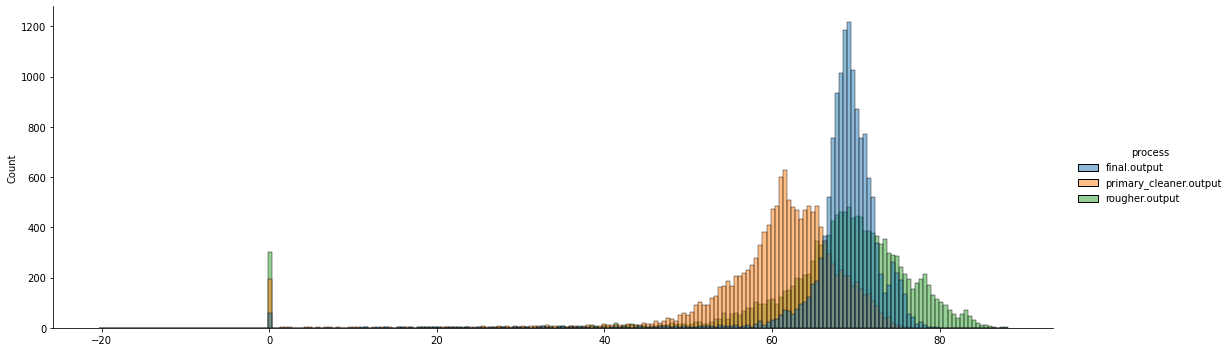

In [28]:
table_print = table_print.T
table_print.index.name = 'process'
table_print.reset_index()
table_print = table_print.groupby(by='process').sum()
table_print = table_print.T
sns.displot(table_print, height=5, aspect = 3)

<b>Вывод по анализу данных</b></p>Установлены отдельные околонулевые и отрицательные значения концентрации веществ (pb и sol), а также околонулевые значения суммарной концентрации веществ. Причина таких значений не ясна, однако вероятно что суммарное значение концентрации веществ менее 10% свидетельствует что технологический процесс на данном этапе был приостановлен частично либо полностью. Таким образом предлагается отбросить строки с суммарным значением концентрации веществ менее 10% (либо отрицательной). При этом единичные случаи отрицательных значений концентрации по отдельным металлам может быть вызвано спецификой работы оборудования или технологии проведения замеров.</p>Иных значимых отклонений в данных не установлено.

In [29]:
#удалим из учебного дата-сета строки по которым значения суммарной концентрации оказываются менее 10%
data_train_fill_clear = data_train_fill[(table_print['final.output']>0.1)&(table_print['primary_cleaner.output']>0.1)&(table_print['rougher.output']>0.1)].reset_index()
data_train_fill_clear = data_train_fill_clear[(data_train_fill_clear['rougher.output.recovery']>0)&(data_train_fill_clear['final.output.recovery']>0)]

## Построение модели

In [30]:
#согласно задания создадим функцию для рассчета метрики sMAPE

#Функция для расчета smape при одновременной передаче и получению от модели обоих целевых признаков
# к сожалению так и не объяснили как заставить ее работать с  cross_value.... поэтому просто оставлю ее здесь
def smape (s_target,s_prediction):
    #print(rough_prediction)
    s_target=pd.DataFrame(s_target)
    s_prediction=pd.DataFrame(s_prediction)
 
    rough_smape_col = abs(s_target['rougher.output.recovery']-s_prediction[1])/((abs(s_target['rougher.output.recovery'])+abs(s_prediction[1]))/2)
    rough_smape = np.mean(rough_smape_col)
    print(rough_smape)
    
    final_smape_col = abs(s_target['final.output.recovery']-s_prediction[2])/((abs(s_target['final.output.recovery'])+abs(s_prediction[2]))/2)
    final_smape = np.mean(final_smape_col)
    
    return 0.25*rough_smape+0.75*final_smape
scorer = make_scorer(smape, greater_is_better=False)

def smape_part(target, prediction):
    partial_smape = abs(target-prediction)/((abs(target)+abs(prediction))/2)
    return np.mean(partial_smape)
scorer_part = make_scorer(smape_part, greater_is_better=False)

def smape_full(rough_smape,final_smape):
    return (0.25*rough_smape+0.75*final_smape)

In [31]:
#сформируем массивы значений для обучения моделей и предсказаний сразу по 2 признакам
target_test = pd.DataFrame(data_test_fill['date'])
target_test = pd.merge(target_test,data_full.loc[:,('date','rougher.output.recovery','final.output.recovery')], how = 'left', left_on = 'date', right_on = 'date')
target_train = data_train_fill_clear.loc[:,('rougher.output.recovery','final.output.recovery')]

In [32]:
#получаем список с названиями колонок из тестового файла, т.к. нам нужно сократить данные до объема данных тестового файла
general_columns = data_test_fill.columns
data_train_model = data_train_fill_clear.loc[:,general_columns]

In [33]:
#убираем столбец date, получаем features & target для модели
target_test = target_test.drop('date',axis=1)
data_train_model = data_train_model.drop('date',axis=1)
data_test_model = data_test_fill.drop('date',axis=1)

In [34]:
#сформируем массивы целевых значений для обучения моделей и предсказаний раздельно для 1 и 2-го этапа
target_train_rough=data_train_fill_clear['rougher.output.recovery']
target_train_final=data_train_fill_clear['final.output.recovery']
target_test_rough = target_test['rougher.output.recovery']
target_test_final = target_test['final.output.recovery']

Осуществим обучение и оценку моделей Линейной регрессии и Случайного леса

In [35]:
#случайный лес
forest_stats = pd.DataFrame(columns=['rough_smape','final_smape','full_smape','estimators','depth'])
for estimators in range(50, 500, 50):
    for depth in range(2, 6):

        model_forest = RandomForestRegressor(max_depth=depth, n_estimators=estimators, random_state=12345)

        rough_smape = np.mean(cross_val_score(model_forest, data_train_model, target_train_rough, cv=5, scoring=scorer_part, n_jobs=-1))
        final_smape = np.mean(cross_val_score(model_forest, data_train_model, target_train_final, cv=5, scoring=scorer_part, n_jobs=-1))
        rower=(rough_smape,final_smape,smape_full(rough_smape,final_smape),estimators,depth)
        try:
            forest_stats.loc[len(forest_stats)+1]=rower 
            print(rower)
        except:
            print(rower)
forest_stats.sort_values(by='full_smape')

(-0.07107664751094056, -0.09099324345008733, -0.08601409446530064, 50, 2)
(-0.06578050885450476, -0.09055527407516224, -0.08436158276999788, 50, 3)
(-0.06581170372349157, -0.08970839316421189, -0.08373422080403181, 50, 4)
(-0.06366229137372874, -0.09087155010776757, -0.08406923542425786, 50, 5)
(-0.07057980966995232, -0.09070145861664267, -0.08567104637997007, 100, 2)
(-0.06557693464187848, -0.09021154299227421, -0.08405289090467528, 100, 3)
(-0.06526692289892025, -0.08915128314916934, -0.08318019308660707, 100, 4)
(-0.06347847542994074, -0.09004373249245848, -0.08340241822682905, 100, 5)
(-0.07045557585628559, -0.09079624809567317, -0.08571108003582628, 150, 2)
(-0.0655468105224144, -0.09030856914636645, -0.08411812949037845, 150, 3)
(-0.06537505919074345, -0.08946191017845402, -0.08344019743152638, 150, 4)
(-0.06344623458076785, -0.09022370109629829, -0.08352933446741569, 150, 5)
(-0.07027710086031488, -0.09076307711344565, -0.08564158305016295, 200, 2)
(-0.0655128656572543, -0.09031

,rough_smape,final_smape,full_smape,estimators,depth
1,-0.071077,-0.090993,-0.086014,50.0,2.0
9,-0.070456,-0.090796,-0.085711,150.0,2.0
5,-0.070580,-0.090701,-0.085671,100.0,2.0
13,-0.070277,-0.090763,-0.085642,200.0,2.0
17,-0.070139,-0.090717,-0.085572,250.0,2.0
25,-0.070103,-0.090704,-0.085554,350.0,2.0
29,-0.070119,-0.090683,-0.085542,400.0,2.0
21,-0.070020,-0.090705,-0.085533,300.0,2.0
33,-0.070044,-0.090681,-0.085522,450.0,2.0
2,-0.065781,-0.090555,-0.084362,50.0,3.0


In [36]:
#Линейная регрессия
model_regre = LinearRegression()
rough_smape = np.mean(cross_val_score(model_regre, data_train_model, target_train_rough, cv=5, scoring=scorer_part))
final_smape = np.mean(cross_val_score(model_regre, data_train_model, target_train_final, cv=5, scoring=scorer_part))
print('rough_smape',rough_smape,'final_smape',final_smape,'full_smape',smape_full(rough_smape,final_smape))


rough_smape -0.07230674252722563 final_smape -0.10963326038744856 full_smape -0.10030163092239282


<b>Вывод по выбору модели</b> наилучшие показатели достигнуты на модели Случайный лес:
- depth = 4, n_estimators = 100, random_state = 12345;
- sMAPE = 8,318%

<b>Проверка на тестовой выборке</b>

Проверим лучшую из полученных моделей на тестовой выборке

In [37]:
model_regre = RandomForestRegressor(max_depth=4, n_estimators=100, random_state=12345)

model_regre.fit(data_train_model,target_train_rough)
predictions_rough = model_regre.predict(data_test_model)

model_regre.fit(data_train_model,target_train_final)
predictions_final = model_regre.predict(data_test_model)

rough_smape = smape_part(target_test_rough,predictions_rough)
final_smape = smape_part(target_test_final,predictions_final)
print('rough_smape',rough_smape,'final_smape',final_smape,'full_smape',smape_full(rough_smape,final_smape))


rough_smape 0.08146287336907183 final_smape 0.09932178050601859 full_smape 0.0948570537217819


Проверка на тестовой модели показала результаты хуже чем на учебной выборке - 9,486% против 8,318%, однако лучше чем на модели линейной регрессии.

<b>Проверка модели на адекватность</b>

In [38]:
#проверим качество выбранной модели на константной модели
model_check = DummyRegressor(strategy='mean')

rough_smape = np.mean(cross_val_score(model_check, data_train_model, target_train_rough, cv=5, scoring=scorer_part))
final_smape = np.mean(cross_val_score(model_check, data_train_model, target_train_final, cv=5, scoring=scorer_part))
print('rough_smape',rough_smape,'final_smape',final_smape,'full_smape',smape_full(rough_smape,final_smape))

rough_smape -0.07753620223151501 final_smape -0.10260602115084527 full_smape -0.09633856642101271


Качество выбранной модели, оказалось лучше чем у констанстной модели - sMAPE оказалось меньше у выбранной модели.

## Вывод

- Проанализированы представленные данные, удалены строки с предположительно некорректными значениями, обусловленными нулевыми значениями концентрации металлов, либо коолонулевыми значениями суммарной концентрации.
- проведено тестирование возможных моделей. Выбрана лучшая модель - RandomForestRegressor с параметрами depth = 4, n_estimators = 100, random_state = 12345.